<a href="https://colab.research.google.com/github/GISChat/Fine-tune-bert/blob/main/GISchat_bert_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ÂáÜÂ§á

In [2]:
# @title ÂÆâË£ÖÂøÖË¶ÅÁöÑÂåÖ
!pip install transformers datasets evaluate

In [3]:
# @title ÂøÖË¶ÅÁöÑÊùÉÈôêÈ™åËØÅÔºàËØ∑Â°´ÂÜôÊúâwriteÊùÉÈôêÁöÑtokenÔºâ
from huggingface_hub import notebook_login

notebook_login()

# ËÆ≠ÁªÉ

Thanks to


*   https://github.com/yemanzhongting/NoiseExposure/blob/main/fine_tune_bert.py
*   https://huggingface.co/datasets/dirtycomputer/weibo_senti_100k
* https://github.com/SophonPlus/ChineseNlpCorpus/blob/master/datasets/weibo_senti_100k/intro.ipynb
* bert base chinese : https://huggingface.co/google-bert/bert-base-chinese
* https://huggingface.co/docs/transformers/training







Âú®ÂæÆË∞É BERT Ê®°ÂûãÊó∂ÔºåÈÄöÂ∏∏Áõ¥Êé•‰ΩøÁî® BertTokenizer ÂØπÊñáÊú¨ËøõË°åÂàÜËØçÂíåÁºñÁ†ÅÔºåÂõ†‰∏∫ÂÆÉ‰∏é BERT Ê®°ÂûãÁöÑÈ¢ÑËÆ≠ÁªÉËØçÊ±áË°®ÂíåÁºñÁ†ÅÊ†ºÂºèÂÆåÂÖ®ÂÖºÂÆπ„ÄÇ

## Âä†ËΩΩÊï∞ÊçÆÈõÜ

In [4]:
# @title Âä†ËΩΩÂæÆÂçö100kÊï∞ÊçÆÈõÜ
from datasets import load_dataset
import pandas as pd

ds = load_dataset("dirtycomputer/weibo_senti_100k")
ds

DatasetDict({
    train: Dataset({
        features: ['label', 'review'],
        num_rows: 119988
    })
})

In [5]:
# @title
# Êü•ÁúãÊï∞ÊçÆÈõÜÊï∞ÊçÆÈõÜÊúâ‰∏Ä‰∏™ÈªòËÆ§ÁöÑÂàÜÂâ≤Ôºå'train'
df = pd.DataFrame(ds['train'])
df

label                                             review
0           1              ÔªøÊõ¥Âçö‰∫ÜÔºåÁàÜÁÖß‰∫ÜÔºåÂ∏ÖÁöÑÂëÄÔºåÂ∞±ÊòØË∂äÊù•Ë∂äÁà±‰Ω†ÔºÅÁîüÂø´ÂÇªÁº∫[Áà±‰Ω†][Áà±‰Ω†][Áà±‰Ω†]
1           1  @Âº†ÊôìÈπèjonathan ÂúüËÄ≥ÂÖ∂ÁöÑ‰∫ãË¶ÅËÆ§ÁúüÂØπÂæÖ[ÂìàÂìà]ÔºåÂê¶ÂàôÁõ¥Êé•ÂºÄÈô§„ÄÇ@‰∏Å‰∏ÅÁúã‰∏ñÁïå ÂæàÊòØÁªÜÂøÉ...
2           1  ÂßëÂ®òÈÉΩÁæ°ÊÖï‰Ω†Âë¢‚Ä¶ËøòÊúâÊãõË¥¢Áå´È´òÂÖ¥‚Ä¶‚Ä¶//@Áà±Âú®ËîìÂª∂-JC:[ÂìàÂìà]Â∞èÂ≠¶Âæí‰∏ÄÊûöÔºåÁ≠âÁùÄÊòéÂ§©ËßÅÊÇ®Âë¢/...
3           1                                         Áæé~~~~~[Áà±‰Ω†]
4           1                                  Ê¢¶ÊÉ≥ÊúâÂ§öÂ§ßÔºåËàûÂè∞Â∞±ÊúâÂ§öÂ§ß![ÈºìÊéå]
...       ...                                                ...
119983      0  ‰∏ÄÂÖ¨Èáå‰∏çÂà∞ÔºåÂéøÂåªÈô¢ÈÇ£‰∏™Â§©Ê°•‰∏ãÂè≥Êãê200Á±≥Â∞±Âà∞‰∫ÜÔºÅ//@Ë∞¢Á§ºÊÅí: ÊàëÈù†„ÄÇËøô‰∏™Â§™Èú∏ÈÅì‰∫ÜÔºÅÁ¶ª224...
119984      0                ‰ªäÂ§©ÁúüÂÜ∑ÂïäÔºåÈöæÈÅìÂèàË¶ÅÁ©øÊ£âË¢Ñ‰∫Ü[Êôï]Ôºü‰ªäÂπ¥ÁöÑÊò•Â§©ÁúüÁöÑÊòØÁôæÂèòËé´ÊµãÂïä[ÊäìÁãÇ]
119985      0                                   ÊúÄËøëÂá†Â§©Â∞±Ê≤°ÂÅúÊ≠¢ËøáÔºÅÔºÅÔºÅ[‰º§ÂøÉ]
119986      0                                   //@ÊØíËçØÂ•≥ÊµÅÊ∞ì:[ÊÄí] ÂæàÊÉ®!
119987      0  Âë¢??@Êù∞?Kelena ÔºüÔºÅ[ÊäìÁãÇ] ?Êêû‰πúÈ¨ºÔºüÔºüÔºÅÔºÅÊÉ≥Áü•ÔºüÂÖ•ÂéªGOtripÁùáÁùáÔºö htt...

[119988 rows x 2 columns]

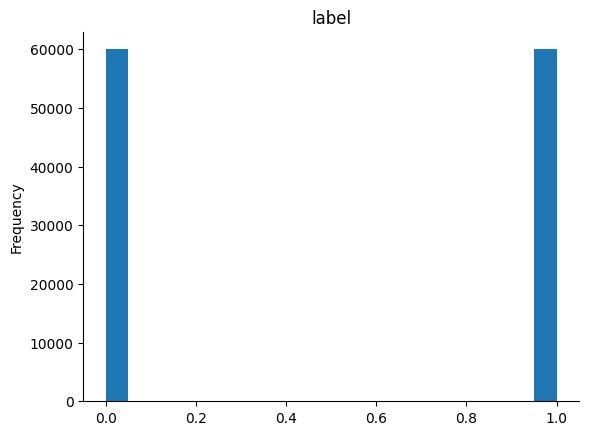

In [6]:
from matplotlib import pyplot as plt
df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
# @title ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
train_df, test_df = train_test_split(df, test_size=0.2,shuffle=True, random_state=42)
print('train_df info')
print('test_df info')
print(train_df)
print(test_df)

train_df info
test_df info
        label                                             review
43852       1               ‰πê‰πêÁöÑÊ≠¶Ê±â‰πãÊ≠¶Ê±âÊ≠•Ë°åË°ó~[ÂìàÂìà]ÊàëÁ™É‰ª•‰∏∫Âè™ÊØîÂçó‰∫¨ÁöÑÂ§´Â≠êÂ∫ôÂ•Ω‰∫ÜÈÇ£‰πà‰∏Ä‰∏¢‰∏¢~
21608       1        ‚Üí_‚Üí//@ÊúÄÁà±Cruise: ÁÑ∂ÂêéÂéªÂåªÈô¢ÂåªÁîüÁªôÁÅ´Êü¥ÂåÖËµ∑‰∏ÄÂúàÁª∑Â∏¶Âá∫Êù•Â∞±ÊàêÊ£âÁ≠æ‰∫Ü[ÂìàÂìà]
91972       0                                   ÂçàÈ•≠Êù•‰∏çÂèäÂêÉÔºåÂÖàÂû´‰∏ãËÇöÂ≠ê„ÄÇ[Ê≥™]
78263       0  [Ê±ó]//@LimingX:[Ë°∞] //@‰∏áÊòä-ÁôæÂ∫¶: @cremer_xiao ÊÉ≥ÊÉ≥ÂäûÊ≥ïÂêß...
73639       0                      Êò®Â§©Ë¢´‰∫∫ÊÅ∂‰ΩúÂâß‰∫ÜÔºåË°®ÁôΩ‰ªÄ‰πàÁöÑ‰∏çÊòØÁúüÁöÑ? [Êôï][Êôï][Êôï]
...       ...                                                ...
110268      0  Ë∞¢Ë∞¢ÔºÅ‰∫≤Áà±ÁöÑ @ÈÄóË±ÜËäΩÂÑø Êî∂Âà∞‰∫Ü‰Ω†‰ªé‰∏â‰∫öÈÄÅÊù•ÁöÑÁ§ºÁâ©~ ÂñúÊ¨¢ÂíñÂï°ÁöÑÊàëËá™ÁÑ∂Âú∞Áà±ÂêÉÂíñÂï°Á≥ñÔºåÂÖ∂‰ªñ‰∏â‰∫ö...
119879      0                     [Ë°∞]Èô§‰∫ÜÊúÄÂêé‰∏ÄÂº†ÔºåÂá†Â§ß‰∏ªÊåÅÈÉΩË¢´Èªë‰∫Ü‰∏ÄÈÅç~Â∞èÁºñ‰Ω†ÊòØË¶ÅÈóπÂì™Ê†∑Ôºü
103694      0                         

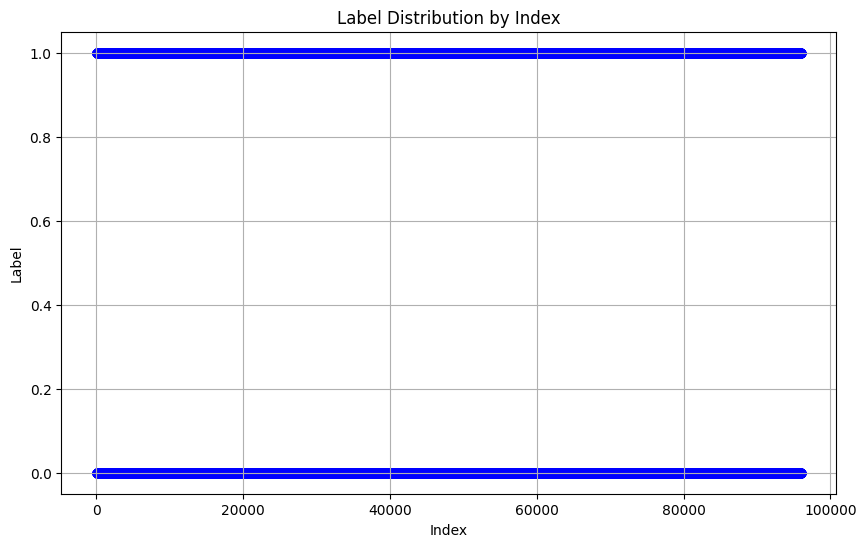

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
train_df_plt = train_df.copy()
train_df_plt['id'] = range(1, len(train_df_plt) + 1)
# ‰ª• index ‰Ωú‰∏∫Ê®™ËΩ¥Ôºålabel Âàó‰Ωú‰∏∫Á∫µËΩ¥ËøõË°åÊï£ÁÇπÂõæÂèØËßÜÂåñ
plt.figure(figsize=(10, 6))
plt.scatter(train_df_plt['id'], train_df_plt['label'], color='b')
plt.xlabel('Index')
plt.ylabel('Label')
plt.title('Label Distribution by Index')
plt.grid(True)
plt.show()

In [9]:
# @title Ê£ÄÊü•ËÆæÂ§áÂèØÁî®ÊÄß ÂàùÂßãÂåñÂàÜËØçÂô®
# Ê£ÄÊü•ÊòØÂê¶ÊúâÂèØÁî®ÁöÑ CUDA ËÆæÂ§á
if torch.cuda.is_available():
    # ÊåáÂÆö‰ΩøÁî® cuda:1
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# ÂàùÂßãÂåñÂàÜËØçÂô®
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

## ËÆ≠ÁªÉÊñπÊ≥ï‰∏Ä

In [ ]:
# @title ÂàõÂª∫Êï∞ÊçÆÈõÜ
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)
# ÂàõÂª∫Á±ªÂà´Âà∞Á¥¢ÂºïÁöÑÊò†Â∞Ñ
label_to_index = {label: idx for idx, label in enumerate(df['label'].unique())}
# ‰ΩøÁî®Êò†Â∞ÑÊù•Êõ¥Êñ∞Ê†áÁ≠æ
train_labels = [label_to_index[label] for label in train_df['label']]
test_labels = [label_to_index[label] for label in test_df['label']]
print(f'train_labels:{train_labels}')
print(f'test_labels:{test_labels}')
# ÁÑ∂ÂêéÂú®ÂàõÂª∫Êï∞ÊçÆÈõÜÊó∂‰ΩøÁî®Ëøô‰∫õÊõ¥Êñ∞ÂêéÁöÑÊ†áÁ≠æ
train_dataset = TextDataset(tokenizer, train_df['review'].tolist(), train_labels)
test_dataset = TextDataset(tokenizer, test_df['review'].tolist(), test_labels)


# ÂàõÂª∫Êï∞ÊçÆÈõÜ Â¶ÇÊûúÊâÄÊúâÁöÑÊ†áÁ≠æÈÉΩÊòØÊï∞Â≠ó Êú¨ÈÉ®ÂàÜ‰πüÂèØ‰ª•Áõ¥Êé•ÈááÁî®‰∏ãÈù¢ÁöÑ‰∏§Ë°å
# train_dataset = TextDataset(tokenizer, train_df['text'].tolist(), train_df['label'].tolist())
# test_dataset = TextDataset(tokenizer, test_df['text'].tolist(), test_df['label'].tolist())


print(train_dataset)
print(test_dataset)

train_labels:[0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
# @title ËÆæÂÆöÂèÇÊï∞
model = BertForSequenceClassification.from_pretrained('bert-base-chinese', num_labels=len(df['label'].unique()))
model = model.to(device)# Â∞ÜÊ®°ÂûãËΩ¨ÁßªÂà∞ÂØπÂ∫îÁöÑËÆæÂ§áËøêË°å

# ÂÆö‰πâËÆ≠ÁªÉÂèÇÊï∞
training_args = TrainingArguments(
    output_dir='GISchat-weibo-100k-fine-tuned-bert',
    num_train_epochs=1,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=128,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=1000,
    evaluation_strategy="steps",
    eval_steps=500,  # ÊØè500Ê≠•ËøõË°å‰∏ÄÊ¨°ËØÑ‰º∞
    save_strategy = "steps",
    save_steps= 1000,
    # evaluation_strategy ="epoch",
    # save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=True,
    hub_model_id = "wsqstar/GISchat-weibo-100k-fine-tuned-bert"
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


model.safetensors:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# @title ËÆ≠ÁªÉ
trainer.train()

trainer.evaluate()


{'eval_loss': 0.03618502616882324,
 'eval_accuracy': 0.9840403366947246,
 'eval_f1': 0.9840887374849404,
 'eval_precision': 0.9686758812464219,
 'eval_recall': 1.0,
 'eval_runtime': 277.1632,
 'eval_samples_per_second': 86.584,
 'eval_steps_per_second': 1.353,
 'epoch': 1.0}

In [ ]:
# @title ‰øùÂ≠òÊ®°ÂûãÂà∞Êú¨Âú∞
# ‰øùÂ≠òÊ®°ÂûãÂà∞Êú¨Âú∞/ÊàñËÄÖÔºå‰∏ãÈù¢ÊòØËøúÁ®ãÁöÑÊñπÂºèÔºöËøôÈáåÈúÄË¶ÅÊèê‰æõËá™Â∑±ÁöÑÁî®Êà∑ÂêçÂíåËá™Â∑±ÁöÑrepository(ËøôÈáå‰∏çÈúÄË¶ÅËá™Â∑±ÊâãÂä®Êñ∞Âª∫ÔºåÊúâËá™Âä®Âª∫Á´ãÁöÑ)
# output_dir = "wsqstar/GISChat-weibo-100k-fine-tuned-bert"
# # model.save_pretrained(output_dir)
# # tokenizer.save_pretrained(output_dir)
# pr

In [ ]:
# @title ‰∏ä‰º†
# trainer.push_to_hub()
repo_id = "GISChat-weibo-100k-fine-tuned-bert"
tokenizer.push_to_hub(repo_id)

README.md:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/wsqstar/GISchat-weibo-100k-fine-tuned-bert/commit/0d4b73a877e89a15feaa012cc635799805537ad7', commit_message='Upload tokenizer', commit_description='', oid='0d4b73a877e89a15feaa012cc635799805537ad7', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
# !rm -rf /content/GISchat-weibo-100k-fine-tuned-bert/*

## ËÆ≠ÁªÉÊñπÊ≥ï‰∫å

In [10]:
# dsÊù•Ëá™ÂâçÈù¢ÁöÑÊï∞ÊçÆ
ds

DatasetDict({
    train: Dataset({
        features: ['label', 'review'],
        num_rows: 119988
    })
})

In [11]:
# Â∞ÜËÆ≠ÁªÉÈõÜÂàÜÂâ≤‰∏∫Êñ∞ÁöÑËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜ
split_ds = ds['train'].train_test_split(test_size=0.2, shuffle=True, seed=42)
# ËÆøÈóÆÊñ∞ÁöÑËÆ≠ÁªÉÈõÜ
new_train_ds = split_ds["train"]
# ËÆøÈóÆÊñ∞ÁöÑÈ™åËØÅÈõÜ
new_val_ds = split_ds["test"]

split_ds

DatasetDict({
    train: Dataset({
        features: ['label', 'review'],
        num_rows: 95990
    })
    test: Dataset({
        features: ['label', 'review'],
        num_rows: 23998
    })
})

In [12]:
# Ëé∑Âèñ train Êï∞ÊçÆÈõÜ‰∏≠ label Â≠óÊÆµÁöÑÂîØ‰∏ÄÂÄº
train_unique_labels = split_ds['train'].unique('label')
print(f"Train dataset unique labels: {train_unique_labels}")

# Ëé∑Âèñ test Êï∞ÊçÆÈõÜ‰∏≠ label Â≠óÊÆµÁöÑÂîØ‰∏ÄÂÄº
test_unique_labels = split_ds['test'].unique('label')
print(f"Test dataset unique labels: {test_unique_labels}")

Train dataset unique labels: [1, 0]
Test dataset unique labels: [1, 0]


In [13]:
from collections import Counter
from datasets import concatenate_datasets

# ÂêàÂπ∂ËÆ≠ÁªÉ„ÄÅÈ™åËØÅÂíåÊµãËØïÈõÜÁöÑÊ†áÁ≠æ
all_labels = split_ds['train']['label'] + split_ds['test']['label']

# ËÆ°ÁÆóÊ†áÁ≠æÁöÑÂàÜÂ∏É
label_distribution = Counter(all_labels)

# ÊâìÂç∞Ê†áÁ≠æÂàÜÂ∏É
print(label_distribution)

Counter({0: 59995, 1: 59993})


In [14]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-chinese")


def tokenize_function(examples):
    return tokenizer(examples["review"], padding="max_length", truncation=True)


tokenized_datasets = split_ds.map(tokenize_function, batched=True)

Map:   0%|          | 0/23998 [00:00<?, ? examples/s]

In [15]:
# small_train_dataset = tokenized_datasets["train"]
# small_eval_dataset = tokenized_datasets["test"]

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(10000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(3000))

In [16]:
from transformers import AutoModelForSequenceClassification
num_labels = 2
model = AutoModelForSequenceClassification.from_pretrained("bert-base-chinese", num_labels=num_labels)
print(num_labels)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2


In [17]:
from transformers import TrainingArguments

training_args = TrainingArguments("GISchat-weibo-100k-fine-tuned-bert", save_strategy="steps", push_to_hub=True)

In [18]:
import numpy as np
import evaluate

accuracy_metric = evaluate.load("accuracy")

In [19]:
# ÂÆö‰πâËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†áÁöÑÂáΩÊï∞
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    # confusion_matrix = confusion_matrix_metric.compute(predictions=predictions, references=labels)
    return {"accuracy": accuracy["accuracy"]}

In [20]:
from transformers import TrainingArguments, Trainer

# ËÆæÁΩÆËÆ≠ÁªÉÂèÇÊï∞
training_args = TrainingArguments(
    output_dir="GISchat-weibo-100k-fine-tuned-bert",
    num_train_epochs=1,
    learning_rate=1e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    # evaluation_strategy="steps",
    eval_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    logging_dir='./logs',
    logging_steps=200,
    push_to_hub=True,
    hub_model_id="wsqstar/GISchat-weibo-100k-fine-tuned-bert"  # ÊõøÊç¢‰∏∫‰Ω†ÁöÑÁî®Êà∑ÂêçÂíåÊ®°ÂûãÂêçÁß∞
)

In [21]:
from transformers import set_seed

# set_seed(42)  # Á°Æ‰øùËøôÊòØ‰∏Ä‰∏™ÊúâÊïàÁöÑÊï¥Êï∞

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

In [22]:
trainer.train()

TrainOutput(global_step=1250, training_loss=0.1721352954864502, metrics={'train_runtime': 2161.3292, 'train_samples_per_second': 4.627, 'train_steps_per_second': 0.578, 'total_flos': 2631110553600000.0, 'train_loss': 0.1721352954864502, 'epoch': 1.0})

Â∞ÜÊ®°Âûã‰ª•ÂèätokenizerÊé®ÈÄÅÂà∞hugging face


In [23]:
trainer.push_to_hub()


CommitInfo(commit_url='https://huggingface.co/wsqstar/GISchat-weibo-100k-fine-tuned-bert/commit/769a5a8e71c305f100340ef50e54ad0c6bd8d2ce', commit_message='End of training', commit_description='', oid='769a5a8e71c305f100340ef50e54ad0c6bd8d2ce', pr_url=None, pr_revision=None, pr_num=None)

In [24]:

repo_name = 'GISchat-weibo-100k-fine-tuned-bert'
tokenizer.push_to_hub(repo_name)


README.md:   0%|          | 0.00/2.09k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/wsqstar/GISchat-weibo-100k-fine-tuned-bert/commit/e8b23c802050281c1a8b8bd20f6d3c271f98fc89', commit_message='Upload tokenizer', commit_description='', oid='e8b23c802050281c1a8b8bd20f6d3c271f98fc89', pr_url=None, pr_revision=None, pr_num=None)

# ÊµãËØï
# https://huggingface.co/wsqstar/GISchat-weibo-100k-fine-tuned-bert

In [11]:
# @title Êü•Áúãbert-base-chinese
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Âä†ËΩΩÈ¢ÑËÆ≠ÁªÉÁöÑBERTÊ®°ÂûãÂíåÂàÜËØçÂô®
model_name = 'bert-base-chinese'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # ÂÅáËÆæÊúâ2‰∏™Á±ªÂà´

# ÂáÜÂ§áË¶ÅÂàÜÁ±ªÁöÑÊñáÊú¨
texts = ["ÂßëÂ®òÈÉΩÁæ°ÊÖï‰Ω†Âë¢‚Ä¶ËøòÊúâÊãõË¥¢Áå´È´òÂÖ¥‚Ä¶", "Â•ΩÂÜ∑Âïä", "Â•ΩÂÆ≥ÊÄï"]

# ÂØπÊñáÊú¨ËøõË°åtokenizeÂπ∂ËΩ¨Êç¢‰∏∫Ê®°ÂûãËæìÂÖ•Ê†ºÂºè
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

# ‰ΩøÁî®Ê®°ÂûãËøõË°åÊé®ÁêÜ
with torch.no_grad():
    outputs = model(**inputs)

# Ëé∑ÂèñÈ¢ÑÊµãÁªìÊûú
logits = outputs.logits
predictions = torch.argmax(logits, dim=-1)

# ËæìÂá∫È¢ÑÊµãÁ±ªÂà´
for i, text in enumerate(texts):
    print(f"ÊñáÊú¨: {text}")
    print(f"È¢ÑÊµãÁ±ªÂà´: {predictions[i].item()}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ÊñáÊú¨: ÂßëÂ®òÈÉΩÁæ°ÊÖï‰Ω†Âë¢‚Ä¶ËøòÊúâÊãõË¥¢Áå´È´òÂÖ¥‚Ä¶
È¢ÑÊµãÁ±ªÂà´: 1
ÊñáÊú¨: Â•ΩÂÜ∑Âïä
È¢ÑÊµãÁ±ªÂà´: 1
ÊñáÊú¨: Â•ΩÂÆ≥ÊÄï
È¢ÑÊµãÁ±ªÂà´: 0


In [ ]:
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [25]:
# @title Â∞ùËØï‰ΩøÁî®
# Load model directly
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Âä†ËΩΩÊ®°ÂûãÂíåtokenizer
model_name = 'wsqstar/GISchat-weibo-100k-fine-tuned-bert'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Êúâ2‰∏™Á±ªÂà´

# Ê£ÄÊü•Ê®°ÂûãÊòØÂê¶Ê≠£Á°ÆÂä†ËΩΩ
print(model)


model.safetensors:   0%|          | 0.00/409M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(21128, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [26]:

round = 1
while round <= 2:
    print(f'round:{round}')

    # ÂáÜÂ§áË¶ÅÂàÜÁ±ªÁöÑÊñáÊú¨
    texts = ["ÁúüÁöÑÂ•ΩÁæ°ÊÖï", "ÁúüÁöÑÂ•ΩËÆ®Âéå", "‰∏çÁü•ÈÅì‰∏∫‰ªÄ‰πàÊúâÁÇπ‰º§ÂøÉ","Ëøô‰ª∂‰∫ãÊÉÖÂ•ΩÈöæ‰ª•ÁΩÆ‰ø°"]

    # ÂØπÊñáÊú¨ËøõË°åtokenizeÂπ∂ËΩ¨Êç¢‰∏∫Ê®°ÂûãËæìÂÖ•Ê†ºÂºè
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

    # ‰ΩøÁî®Ê®°ÂûãËøõË°åÊé®ÁêÜ
    with torch.no_grad():
        outputs = model(**inputs)

    # Ëé∑ÂèñÈ¢ÑÊµãÁªìÊûú
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

    # ËæìÂá∫È¢ÑÊµãÁ±ªÂà´
    for i, text in enumerate(texts):
        print(f"ÊñáÊú¨: {text}")
        print(f"È¢ÑÊµãÁ±ªÂà´: {predictions[i].item()}")

    round += 1

round:1
ÊñáÊú¨: ÁúüÁöÑÂ•ΩÁæ°ÊÖï
È¢ÑÊµãÁ±ªÂà´: 1
ÊñáÊú¨: ÁúüÁöÑÂ•ΩËÆ®Âéå
È¢ÑÊµãÁ±ªÂà´: 0
ÊñáÊú¨: ‰∏çÁü•ÈÅì‰∏∫‰ªÄ‰πàÊúâÁÇπ‰º§ÂøÉ
È¢ÑÊµãÁ±ªÂà´: 0
ÊñáÊú¨: Ëøô‰ª∂‰∫ãÊÉÖÂ•ΩÈöæ‰ª•ÁΩÆ‰ø°
È¢ÑÊµãÁ±ªÂà´: 0
round:2
ÊñáÊú¨: ÁúüÁöÑÂ•ΩÁæ°ÊÖï
È¢ÑÊµãÁ±ªÂà´: 1
ÊñáÊú¨: ÁúüÁöÑÂ•ΩËÆ®Âéå
È¢ÑÊµãÁ±ªÂà´: 0
ÊñáÊú¨: ‰∏çÁü•ÈÅì‰∏∫‰ªÄ‰πàÊúâÁÇπ‰º§ÂøÉ
È¢ÑÊµãÁ±ªÂà´: 0
ÊñáÊú¨: Ëøô‰ª∂‰∫ãÊÉÖÂ•ΩÈöæ‰ª•ÁΩÆ‰ø°
È¢ÑÊµãÁ±ªÂà´: 0


In [51]:
import torch.nn.functional as F

# Â∫îÁî®softmaxÂáΩÊï∞
probabilities = F.softmax(logits, dim=-1)

# Ëé∑ÂèñÊ¶ÇÁéáÊúÄÈ´òÁöÑÁ±ªÂà´Á¥¢Âºï
predictions = torch.argmax(probabilities, dim=-1)

# ËæìÂá∫È¢ÑÊµãÁ±ªÂà´ÂèäÂÖ∂Ê¶ÇÁéá
for i, text in enumerate(texts):
    print(f"ÊñáÊú¨: {text}")
    predicted_index = predictions[i].item()
    print(f"È¢ÑÊµãÁ±ªÂà´Á¥¢Âºï: {predicted_index}")
    print(f"È¢ÑÊµãÁ±ªÂà´Ê¶ÇÁéá: {probabilities[i, predicted_index].item()}")

ÊñáÊú¨: ÁúüÁöÑÂ•ΩÁæ°ÊÖï
È¢ÑÊµãÁ±ªÂà´Á¥¢Âºï: 1
È¢ÑÊµãÁ±ªÂà´Ê¶ÇÁéá: 0.9278697967529297
ÊñáÊú¨: ÁúüÁöÑÂ•ΩËÆ®Âéå
È¢ÑÊµãÁ±ªÂà´Á¥¢Âºï: 1
È¢ÑÊµãÁ±ªÂà´Ê¶ÇÁéá: 0.7676805257797241
ÊñáÊú¨: ‰∏çÁü•ÈÅì‰∏∫‰ªÄ‰πàÊúâÁÇπ‰º§ÂøÉ
È¢ÑÊµãÁ±ªÂà´Á¥¢Âºï: 0
È¢ÑÊµãÁ±ªÂà´Ê¶ÇÁéá: 0.7125946879386902
ÊñáÊú¨: Ëøô‰ª∂‰∫ãÊÉÖÂ•ΩÈöæ‰ª•ÁΩÆ‰ø°
È¢ÑÊµãÁ±ªÂà´Á¥¢Âºï: 0
È¢ÑÊµãÁ±ªÂà´Ê¶ÇÁéá: 0.575763463973999
